# SVM

In [1]:
# importing variables from pre processing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label

In [2]:
# importing sklearn packages
from sklearn import svm

# model evaluation packages
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# importing libraries
import matplotlib.pyplot as plt

# TRAINING THE MODEL

In [4]:
Svm = svm.SVC(C=1.0, kernel='linear', gamma=0.001, degree=3, coef0=0.0, class_weight=None, probability=False, random_state=None)

In [5]:
# train the classifier
Svm.fit(X_train,y_train)

SVC(gamma=0.001, kernel='linear')

In [6]:
y_pred = Svm.predict(X_test)

# EVALUATION OF MODEL

In [7]:
# calculate f1 score
svm_f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score of svm: ",svm_f1)

F1-score of svm:  0.9349789331743484


In [8]:
# calculate accuraccy
svm_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of svm: ",svm_accuracy)

Accuracy of svm:  0.935


In [9]:
# calculate recall
svm_recall = recall_score(y_test,y_pred)
print("Recall of svm: ",svm_recall)

Recall of svm:  0.953


In [10]:
# calculate precision
svm_precision = precision_score(y_test,y_pred)
print("Precision of svm: ",svm_precision)

Precision of svm:  0.9198841698841699


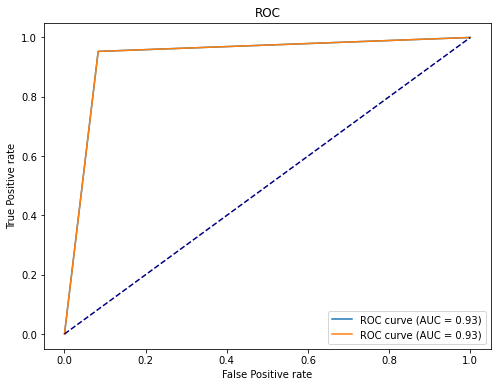

In [11]:
# Evaluate the roc

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label)):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(label)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [12]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)

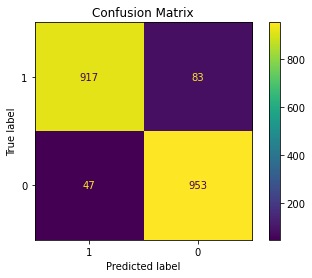

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=label)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

In [14]:
# saving the metrics for comparision
%store svm_accuracy
%store svm_precision
%store svm_recall
%store svm_f1

Stored 'svm_accuracy' (float64)
Stored 'svm_precision' (float64)
Stored 'svm_recall' (float64)
Stored 'svm_f1' (float64)
